In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from robustats import weighted_median as wm
from scipy.optimize import minimize
from numba import njit

sns.set_style("whitegrid")

## Question 3

### 1. (a)

#### Helper Functions

In [2]:
def load_data():
    df = pd.read_stata("data/rscfp2019.dta")
    df = df[["wgt", "age", "income", "networth"]].rename(
        columns={"wgt": "weight", "networth": "wealth",},
    )
    return df

In [3]:
def weighted_median(df, value_col, weight_col="weight"):
    median = wm(df[value_col].values, df[weight_col].values)
    return median

In [4]:
def time_to_age(time):
    return time + 24

In [5]:
def rolling_weighted_median(df, last_period, left_window, right_window):

    results = pd.DataFrame(columns=["age", "income", "wealth"]).set_index("age")
    for time in range(1, last_period):
        age = time_to_age(time)
        left = age - left_window
        right = age + right_window

        data = df.query("@left <= age <= @right")

        income = weighted_median(data, value_col="income")
        wealth = weighted_median(data, value_col="wealth")

        results.loc[age, :] = (income, wealth)

    return results

In [6]:
def wealth_to_income(df):
    median = rolling_weighted_median(df, last_period=60, left_window=2, right_window=2)
    ratio = median["wealth"] / median["income"]
    ratio = ratio.to_frame("ratio").reset_index().astype(float)
    return ratio

#### Computation

In [7]:
df = load_data()

In [8]:
ratio = wealth_to_income(df)

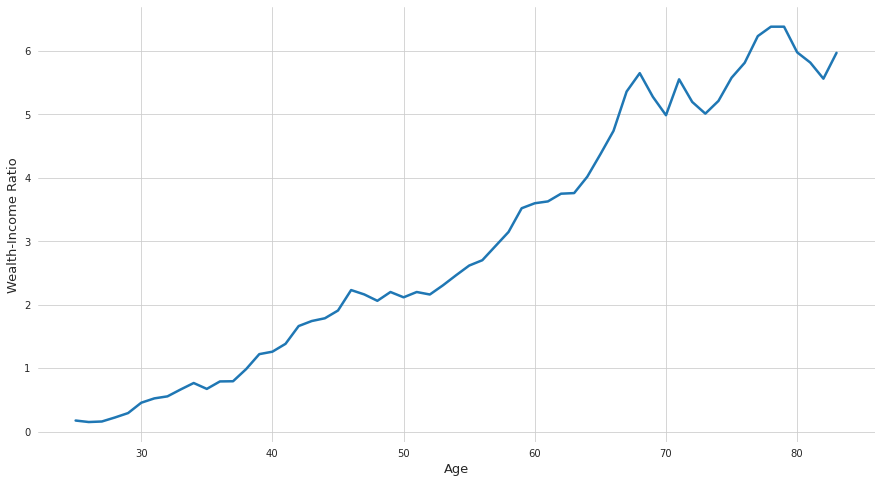

In [9]:
fig, ax = plt.subplots(1)
fig.set_size_inches(15, 8)

sns.lineplot(data=ratio, x="age", y="ratio", ax=ax, linewidth=2.5)
ax.set_frame_on(False)
ax.set(ylabel="Wealth-Income Ratio", xlabel="Age")
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)

plt.show()

### 1. (b)